In the company there are 6 levels (described below). Identify, for each employee, her corresponding level.

How many people each employee manages? You should have a table with employee ids and the number of people managed. Consider that if John directly manages 2 people and these two people manage 5 people each, then we conclude that John manages 12 people.

Build a model to predict the salary of each employee.

Describe the main factors impacting employee salaries. Do you think the company has been treating its employees fairly? Do you see any bias? What are the next steps you would suggest to the Head of HR?

In [8]:
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [9]:


ch = pd.read_csv('company_hierarchy.csv')
ee = pd.read_csv('employee.csv')
df = pd.merge(ch, ee, left_on='employee_id', right_on='employee_id')

In [10]:
df.head()

,employee_id,boss_id,dept,signing_bonus,salary,degree_level,sex,yrs_experience
0,46456,175361.0,sales,0,213000.0,Bachelor,M,5
1,104708,29733.0,HR,0,79000.0,Bachelor,F,3
2,120853,41991.0,sales,0,199000.0,High_School,M,5
3,142630,171266.0,HR,0,143000.0,PhD,F,13
4,72711,198240.0,sales,0,235000.0,Master,M,1


In [11]:
ee.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience
0,138719,0,273000.0,Master,M,2
1,3192,0,301000.0,Bachelor,F,1
2,114657,0,261000.0,Master,F,2
3,29039,0,86000.0,High_School,F,4
4,118607,0,126000.0,Bachelor,F,3


In [12]:
df.describe()

,employee_id,boss_id,signing_bonus,salary,yrs_experience
count,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000
mean,100001.855800,103299.980498,0.301400,189111.800000,3.875200
std,57500.488641,57508.798817,0.458889,88973.796898,3.107409
min,40.000000,79.000000,0.000000,60000.000000,1.000000
25%,50574.500000,55883.000000,0.000000,110000.000000,2.000000
50%,99244.500000,102712.000000,0.000000,182000.000000,3.000000
75%,149748.500000,152288.000000,1.000000,255000.000000,5.000000
max,199956.000000,199950.000000,1.000000,700000.000000,34.000000


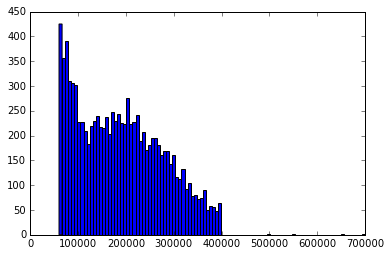

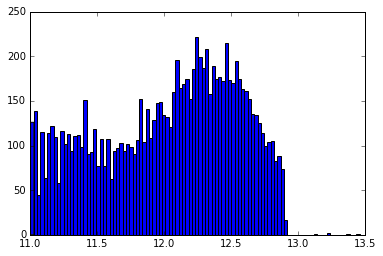

In [13]:
plt.hist(df.salary, bins=100) and plt.show()
plt.hist(np.log(df.salary), bins=100)
plt.show()

0.344169142404 5146281639.17 5206483747.83


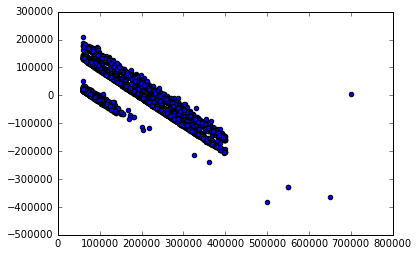

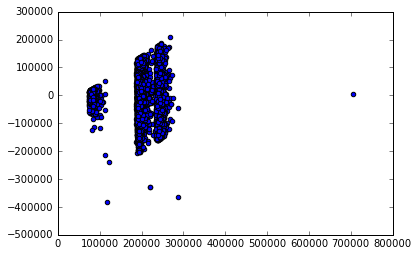

In [27]:
x = pd.get_dummies(df[[ 'dept', 'degree_level', 'signing_bonus', 'yrs_experience', 'sex' ]]) 
# x = PolynomialFeatures(degree=2).fit_transform(x)

# x = np.log(x)
y= df['salary']
y = np.log(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

lr = LinearRegression()
lr.fit(x_train, y_train)

print lr.score(x_train, y_train), mean_squared_error(y_test, lr.predict(x_test)), mean_squared_error(y_train, lr.predict(x_train))
plt.scatter(y_train, (lr.predict(x_train) - y_train)) and plt.show()
plt.scatter(lr.predict(x_train), (lr.predict(x_train) - y_train)) and plt.show()

- TODO
managee